## Final Experiment for GVNS

In [1]:
import sys
from os import listdir
from os.path import isfile, join
import string

import numpy as np
from plot_utils import plot_two_solutions
import matplotlib.pyplot as plt 

from ioutils import parse_input
from ioutils import parse_solutions
from utils import get_distance_matrix
from utils import get_discount_matrix
from utils import allocate_paths
from utils import get_nodes
from utils import get_total_cost
from utils import get_flow_from_paths
import cplex_utils
import graph_utils as graph_utils

from ioutils import get_comparison_table_file_name
from utils import get_latest_commit_id
from utils import get_comparison_table

import pandas as pd

In [2]:
DATASET = 'AP'
INPUT_DIRECTORY = "./data/AP/generated/"
SOLUTIONS_FILE ='/home/ubuntu/VNS_for_UMApHMP/data/AP/Solutions-UMApHMP.txt'

In [3]:
from vns import get_initial_solution_random
from vns import get_initial_solution_robust
from vns import get_initial_solution_circle

from vns import local_search_best_improvement
from vns import local_search_first_improvement


from vns import general_VNS

from utils import NEIGHBOURHOOD_TYPES

from ioutils import get_comparison_table_file_name
from utils import get_latest_commit_id

In [4]:
NUMBER_OF_PROBLEMS = 30
OUTPUT_FILE_NAME = get_comparison_table_file_name('final_comparison_gvns', str(NUMBER_OF_PROBLEMS), get_latest_commit_id())

In [5]:
def best_ls(solution, neighbourhood_type, use_c):
    return local_search_best_improvement(solution, neighbourhood_type, use_c)

def first_ls(solution, neighbourhood_type, use_c):
    return local_search_first_improvement(solution, neighbourhood_type, use_c)

def random_init(n, p, distances, nodes_coor):
    return get_initial_solution_random(n, p, distances, nodes_coor)

def grane_init(n, p, distances, nodes_coor):
    return get_initial_solution_robust(n, p, distances, nodes_coor)

def uglovi_init(n, p, distances, nodes_coor):
    return get_initial_solution_circle(n, p, distances, nodes_coor)


In [6]:
# ------- algorithm parameters --------
shaking_intensity = [0, 0.5]
initializations = [random_init, grane_init, uglovi_init]
local_searches = [best_ls, first_ls]
max_iters = [3]
kmax_options = [1,2,3]

In [7]:
methods = []
names = []

for shake_int in shaking_intensity:
        for ls in local_searches:
            for kmax in kmax_options:
                for max_iter in max_iters:
                    methods.append(lambda problem, initial_solution: general_VNS(problem, initial_solution=initial_solution, diversification_param=shake_int, local_search=ls, neighbourhood_types=NEIGHBOURHOOD_TYPES[:kmax], max_iter=max_iter))
                    names.append(" ".join(["GVNS", "shake="+str(shake_int), ls.__name__, "kmax="+str(kmax), "max_iter="+str(max_iter)]))


In [8]:
len(names)

12

In [9]:
names[:5]

['GVNS shake=0 best_ls kmax=1 max_iter=3',
 'GVNS shake=0 best_ls kmax=2 max_iter=3',
 'GVNS shake=0 best_ls kmax=3 max_iter=3',
 'GVNS shake=0 first_ls kmax=1 max_iter=3',
 'GVNS shake=0 first_ls kmax=2 max_iter=3']

In [10]:
comparison_table = get_comparison_table(
    methods,
    names,
    DATASET, INPUT_DIRECTORY, SOLUTIONS_FILE,
    from_problem=8,
    to_problems=NUMBER_OF_PROBLEMS,
    initializations=initializations,
    display_nan=False)
comparison_table.to_csv(OUTPUT_FILE_NAME, index_label='problem')
# comparison_table = pd.read_csv("output/basic_VNS_final_comparison_35_d42a72836976d0d8abf612afa150b58ce819c49f.csv", index_col=0)

  0%|          | 0/22 [00:00<?, ?it/s]

100%|██████████| 22/22 [23:02<00:00, 62.83s/it] 


In [11]:
comparison_table.head(NUMBER_OF_PROBLEMS+1)

,GVNS shake=0 best_ls kmax=1 max_iter=3 random_init - deviation (%),GVNS shake=0 best_ls kmax=1 max_iter=3 random_init - time (s),GVNS shake=0 best_ls kmax=1 max_iter=3 grane_init - deviation (%),GVNS shake=0 best_ls kmax=1 max_iter=3 grane_init - time (s),GVNS shake=0 best_ls kmax=1 max_iter=3 uglovi_init - deviation (%),GVNS shake=0 best_ls kmax=1 max_iter=3 uglovi_init - time (s),GVNS shake=0 best_ls kmax=2 max_iter=3 random_init - deviation (%),GVNS shake=0 best_ls kmax=2 max_iter=3 random_init - time (s),GVNS shake=0 best_ls kmax=2 max_iter=3 grane_init - deviation (%),GVNS shake=0 best_ls kmax=2 max_iter=3 grane_init - time (s),...,GVNS shake=0.5 first_ls kmax=2 max_iter=3 grane_init - deviation (%),GVNS shake=0.5 first_ls kmax=2 max_iter=3 grane_init - time (s),GVNS shake=0.5 first_ls kmax=2 max_iter=3 uglovi_init - deviation (%),GVNS shake=0.5 first_ls kmax=2 max_iter=3 uglovi_init - time (s),GVNS shake=0.5 first_ls kmax=3 max_iter=3 random_init - deviation (%),GVNS shake=0.5 first_ls kmax=3 max_iter=3 random_init - time (s),GVNS shake=0.5 first_ls kmax=3 max_iter=3 grane_init - deviation (%),GVNS shake=0.5 first_ls kmax=3 max_iter=3 grane_init - time (s),GVNS shake=0.5 first_ls kmax=3 max_iter=3 uglovi_init - deviation (%),GVNS shake=0.5 first_ls kmax=3 max_iter=3 uglovi_init - time (s)
20.2,0.0,0.300000,0.0,0.290000,0.0,0.290000,0.00000,0.2900,0.0,0.29000,...,0.0,0.300000,0.0,0.2900,0.0,0.300,0.0,0.290000,0.0,0.30000
20.3,0.0,0.450000,0.0,0.450000,0.0,0.450000,0.00000,0.4500,0.0,0.45000,...,0.0,0.450000,0.0,0.4500,0.0,0.450,0.0,0.450000,0.0,0.50000
20.4,0.0,0.600000,0.0,0.590000,0.0,0.590000,0.00000,0.5800,0.0,0.59000,...,0.0,0.590000,0.0,0.5900,0.0,0.600,0.0,0.600000,0.0,0.60000
20.5,0.0,0.940000,0.0,0.720000,0.0,0.930000,0.00000,0.7100,0.0,0.71000,...,0.0,0.710000,0.0,0.7900,0.0,0.790,0.0,0.710000,0.0,0.71000
25.2,0.0,0.480000,0.0,0.480000,0.0,0.480000,0.00000,0.4800,0.0,0.48000,...,0.0,0.470000,0.0,0.4900,0.0,0.480,0.0,0.480000,0.0,0.48000
25.3,0.0,0.720000,0.0,0.720000,0.0,0.730000,1.38000,0.7300,0.0,0.80000,...,0.0,0.720000,0.0,0.7200,0.0,0.720,0.0,0.880000,0.0,0.72000
25.4,0.0,0.990000,0.0,1.080000,0.0,0.980000,0.00000,0.9900,0.0,1.08000,...,0.0,1.080000,0.0,0.9800,0.0,0.980,0.0,1.080000,0.0,0.98000
25.5,0.0,1.240000,0.0,1.240000,0.0,1.250000,0.00000,1.2500,0.0,1.24000,...,0.0,1.250000,0.0,1.2400,0.0,1.240,0.0,1.240000,0.0,1.23000
40.2,0.0,1.420000,0.0,1.430000,0.0,1.430000,0.00000,1.4200,0.0,1.42000,...,0.0,1.420000,0.0,1.4400,0.0,1.420,0.0,1.410000,0.0,1.43000
40.3,0.0,2.510000,0.0,2.470000,0.0,2.290000,0.00000,2.2800,0.0,2.50000,...,0.0,2.710000,0.0,2.2700,0.0,2.300,0.0,2.480000,0.0,2.29000


In [12]:
def get_all_columns_with_similar_value(df, value):
    return df.loc[:, abs(df.iloc[-1] - value) < 0.02].columns

In [13]:
time_table = comparison_table[comparison_table.columns[1::2]]
deviation_table = comparison_table[comparison_table.columns[::2]]

In [14]:
# min deviation

best_method_per_dev = deviation_table.idxmin(axis=1)[-1]
worst_method_per_dev = deviation_table.idxmax(axis=1)[-1]

best_dev_value = comparison_table[best_method_per_dev]['mean']
worst_dev_value = comparison_table[worst_method_per_dev]['mean']


best_method_per_dev, best_dev_value

('GVNS shake=0 best_ls kmax=1 max_iter=3 random_init - deviation (%)', 0.0)

In [15]:
worst_method_per_dev, worst_dev_value

('GVNS shake=0 best_ls kmax=2 max_iter=3 random_init - deviation (%)', 0.08625)

In [16]:
# min time

best_method_per_time = time_table.idxmin(axis=1)[-1]
worst_method_per_time = time_table.idxmax(axis=1)[-1]

best_time_value = comparison_table[best_method_per_time]['mean']
worst_time_value = comparison_table[worst_method_per_time]['mean']

best_method_per_time, best_time_value

('GVNS shake=0 first_ls kmax=2 max_iter=3 grane_init - time (s)',
 2.3606249999999998)

In [17]:
worst_method_per_time, worst_time_value

('GVNS shake=0.5 best_ls kmax=1 max_iter=3 uglovi_init - time (s)', 2.555625)

In [18]:
# ------- sort all columns based on mean ----------

In [19]:
ten_best_per_time = time_table.sort_values(by='mean', axis=1).iloc[:, : 10]
ten_best_per_time

,GVNS shake=0 first_ls kmax=2 max_iter=3 grane_init - time (s),GVNS shake=0.5 best_ls kmax=3 max_iter=3 uglovi_init - time (s),GVNS shake=0.5 best_ls kmax=2 max_iter=3 grane_init - time (s),GVNS shake=0 first_ls kmax=1 max_iter=3 grane_init - time (s),GVNS shake=0.5 first_ls kmax=2 max_iter=3 uglovi_init - time (s),GVNS shake=0 first_ls kmax=3 max_iter=3 grane_init - time (s),GVNS shake=0 best_ls kmax=3 max_iter=3 grane_init - time (s),GVNS shake=0.5 best_ls kmax=3 max_iter=3 grane_init - time (s),GVNS shake=0 first_ls kmax=3 max_iter=3 random_init - time (s),GVNS shake=0 first_ls kmax=2 max_iter=3 uglovi_init - time (s)
20.2,0.300000,0.30000,0.29,0.290000,0.2900,0.29000,0.290000,0.30000,0.290000,0.290000
20.3,0.450000,0.49000,0.45,0.450000,0.4500,0.45000,0.450000,0.50000,0.580000,0.450000
20.4,0.590000,0.59000,0.60,0.580000,0.5900,0.59000,0.590000,0.59000,0.590000,0.590000
20.5,0.720000,0.79000,0.71,0.720000,0.7900,0.73000,0.720000,0.71000,0.790000,0.710000
25.2,0.480000,0.48000,0.48,0.480000,0.4900,0.48000,0.480000,0.47000,0.480000,0.480000
25.3,0.720000,0.73000,0.72,0.870000,0.7200,0.73000,0.800000,0.73000,0.730000,0.730000
25.4,1.080000,0.98000,1.08,1.080000,0.9800,1.09000,0.970000,1.07000,1.000000,0.990000
25.5,1.220000,1.24000,1.24,1.240000,1.2400,1.23000,1.240000,1.24000,1.250000,1.240000
40.2,1.430000,1.43000,1.43,1.420000,1.4400,1.41000,1.430000,1.42000,1.430000,1.440000
40.3,2.270000,2.27000,2.48,2.280000,2.2700,2.48000,2.470000,2.48000,2.270000,2.350000


In [25]:
ten_best_per_time.to_csv("gvns_best_per_time.csv", index_label='problem')


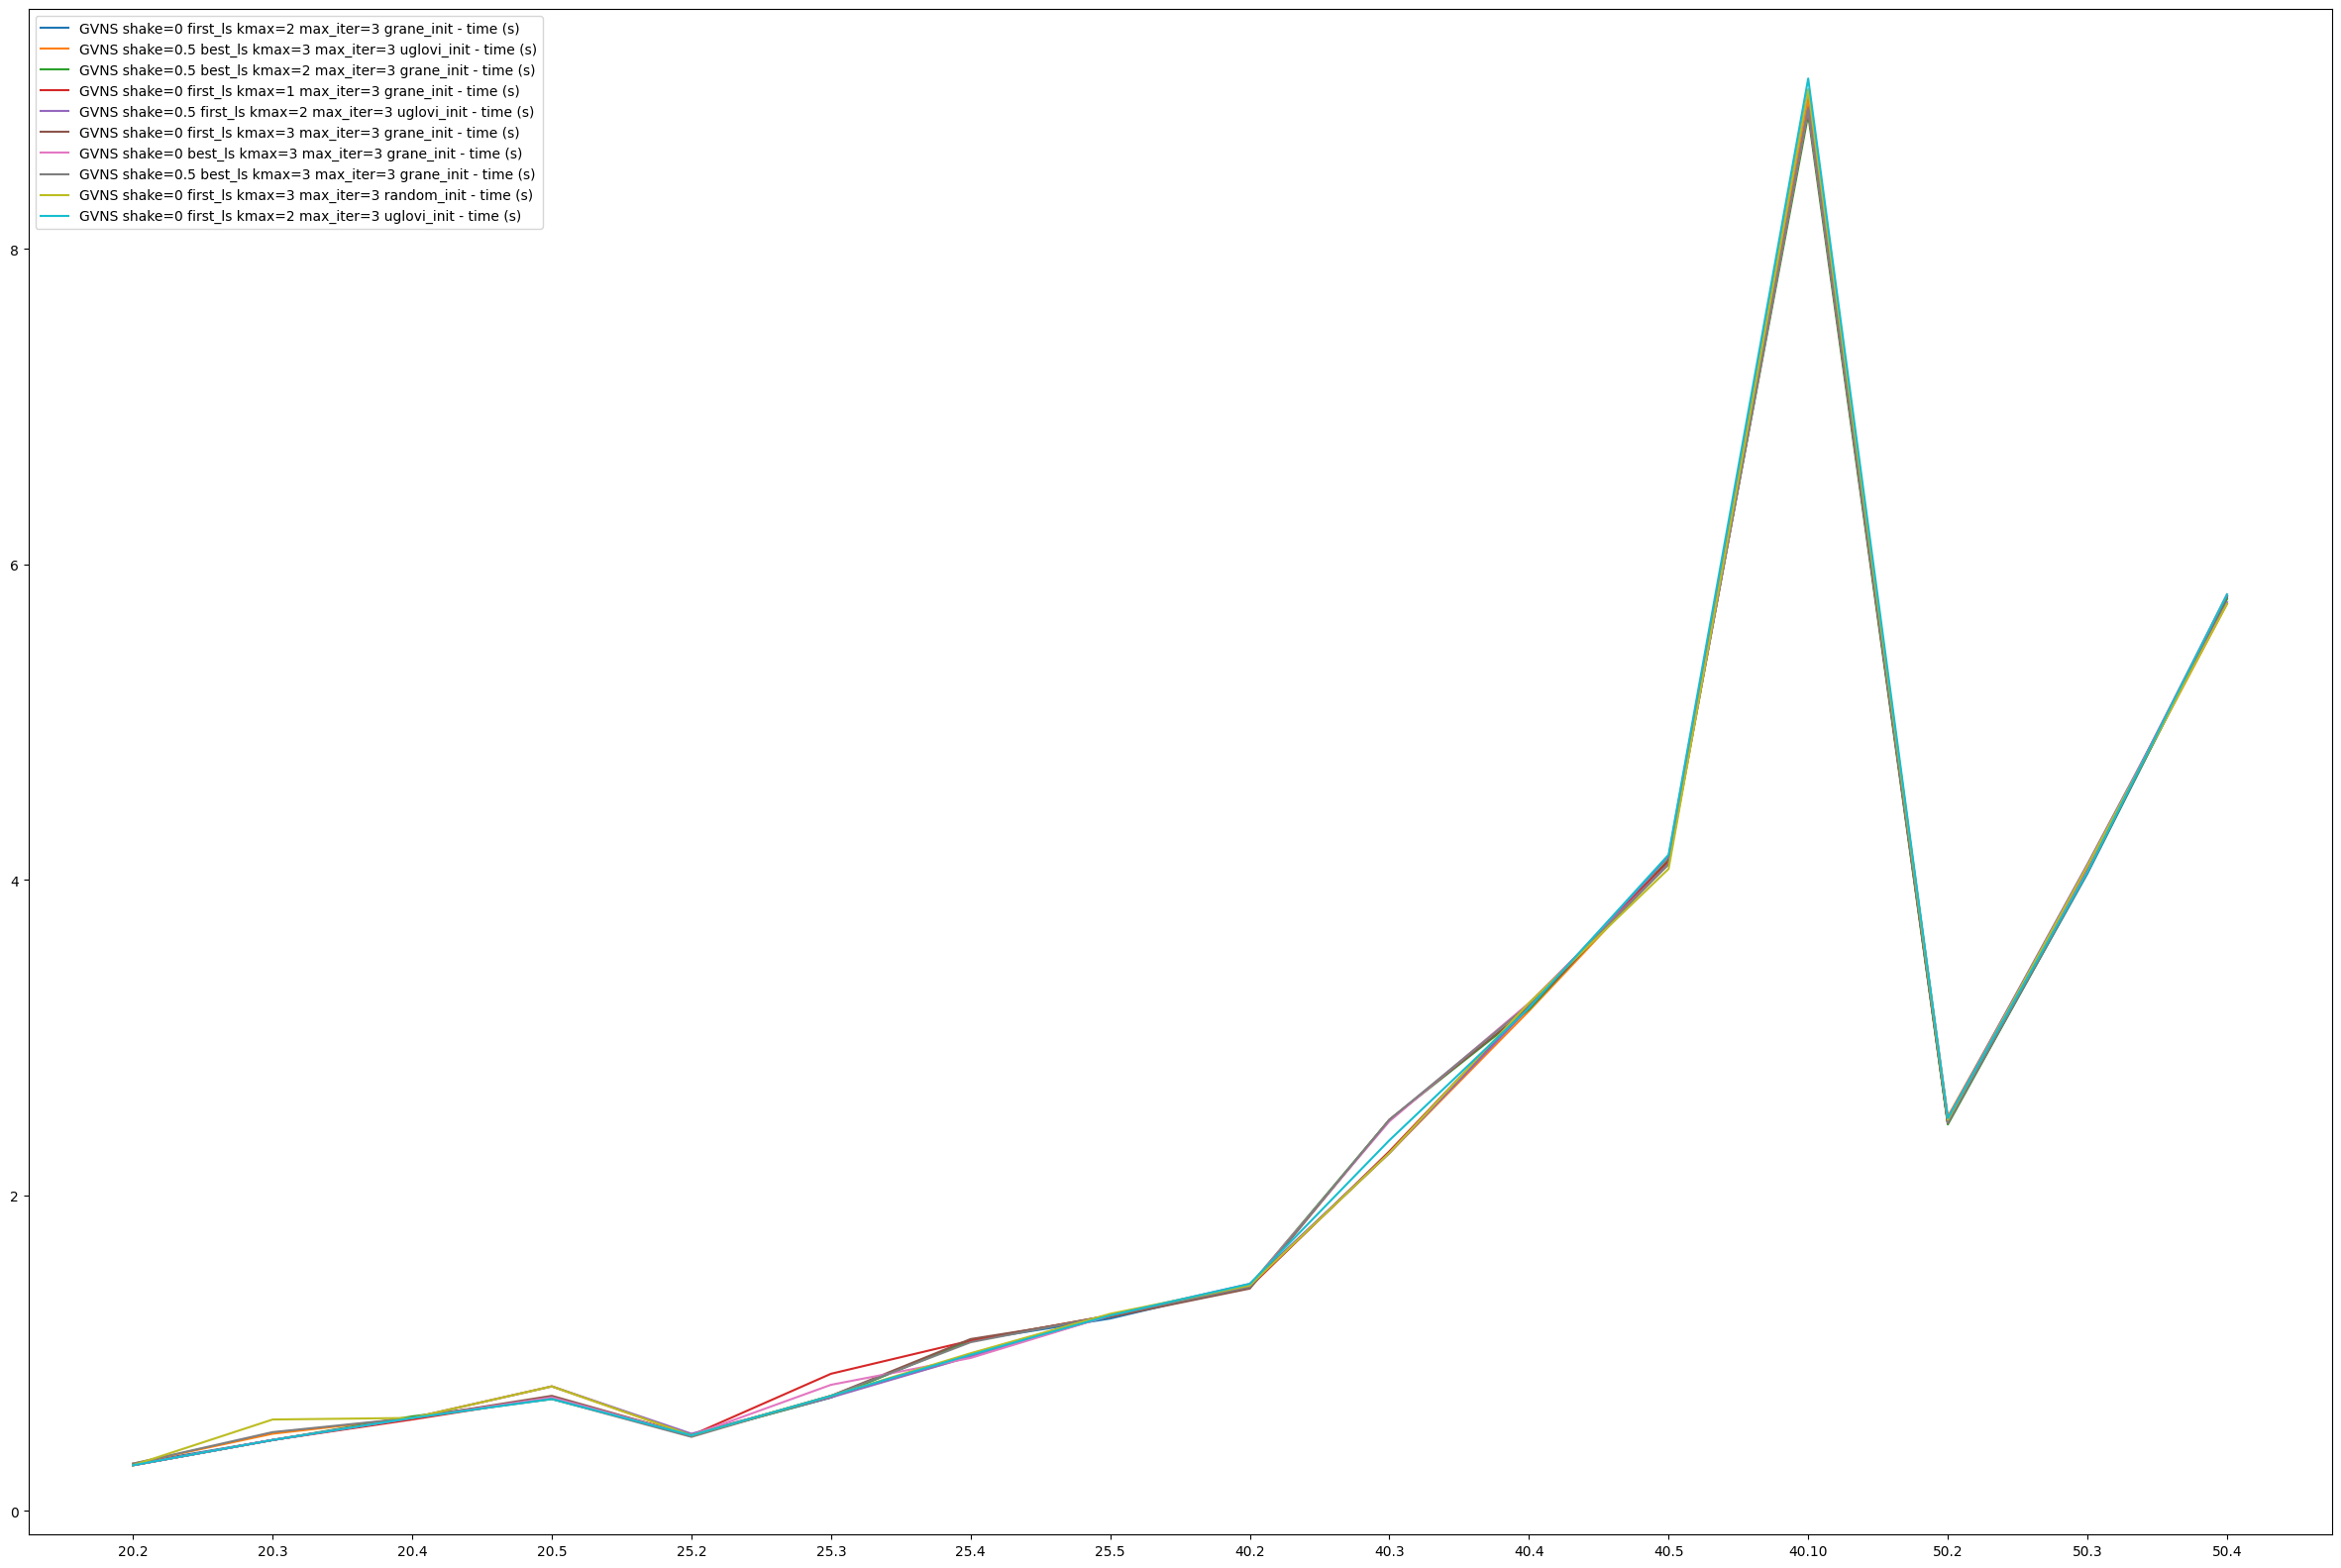

In [21]:
from matplotlib import pyplot as plt

f = plt.figure()
f.set_figwidth(30)
f.set_figheight(20)

for i in range(10):
    plt.plot(time_table.sort_values(by='mean', axis=1).iloc[:-1, i], label=time_table.sort_values(by='mean', axis=1).columns[i])
    plt.legend()


In [22]:
deviation_table.sort_values(by='mean', axis=1).iloc[:, : 10]

,GVNS shake=0 best_ls kmax=1 max_iter=3 random_init - deviation (%),GVNS shake=0.5 best_ls kmax=1 max_iter=3 uglovi_init - deviation (%),GVNS shake=0.5 best_ls kmax=2 max_iter=3 random_init - deviation (%),GVNS shake=0.5 best_ls kmax=2 max_iter=3 grane_init - deviation (%),GVNS shake=0.5 best_ls kmax=2 max_iter=3 uglovi_init - deviation (%),GVNS shake=0.5 best_ls kmax=3 max_iter=3 random_init - deviation (%),GVNS shake=0.5 best_ls kmax=3 max_iter=3 grane_init - deviation (%),GVNS shake=0.5 best_ls kmax=1 max_iter=3 grane_init - deviation (%),GVNS shake=0.5 best_ls kmax=3 max_iter=3 uglovi_init - deviation (%),GVNS shake=0.5 first_ls kmax=1 max_iter=3 grane_init - deviation (%)
20.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
vnd_time_data = pd.read_csv("vnd_ten_best_per_time.csv", index_col=0)

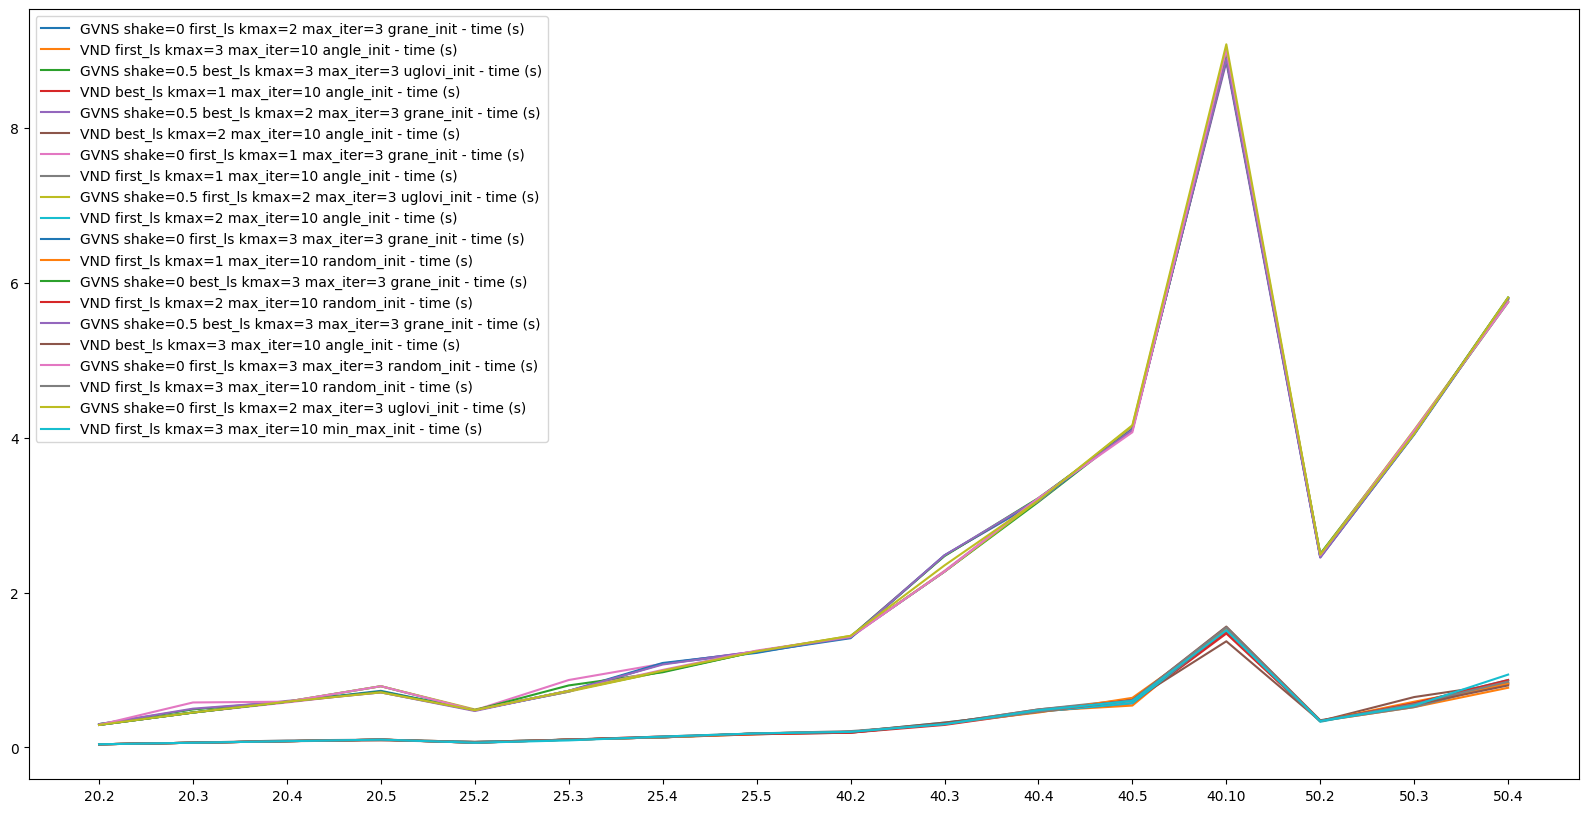

In [24]:
from matplotlib import pyplot as plt

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)

for i in range(10):
    plt.plot(ten_best_per_time.iloc[:-1, i], label=ten_best_per_time.columns[i])
    plt.plot(vnd_time_data.iloc[:-1, i], label=vnd_time_data.columns[i])
    plt.legend()
